In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
df=pd.read_csv('/content/Retail inventory.csv')
df.head()

,Store,Date,Product,Weekly_Sales,inventory level,Temperature,Past promotion of product in lac,demand forecast
0,1,05-02-2010,Blueberry scented candle,1643690.90,0,42.31,2.572,8.106
1,4,12-02-2010,Stainless steel water bottle,1641957.44,1,38.51,2.548,8.106
2,5,19-02-2010,Leather messenger bag,1611968.17,0,39.93,2.514,8.106
3,2,26-02-2010,Organic coconut oil,1409727.59,0,46.63,2.561,8.106
4,3,05-03-2010,Bluetooth wireless earbuds,1554806.68,0,46.50,2.625,8.106


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Store                             499 non-null    int64  
 1   Date                              499 non-null    object 
 2   Product                           499 non-null    object 
 3   Weekly_Sales                      499 non-null    float64
 4   inventory level                   499 non-null    int64  
 5   Temperature                       499 non-null    float64
 6   Past promotion of product in lac  499 non-null    float64
 7   demand forecast                   499 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 31.3+ KB


In [5]:
df.describe()

,Store,Weekly_Sales,inventory level,Temperature,Past promotion of product in lac,demand forecast
count,499.000000,4.990000e+02,499.00000,499.000000,499.000000,499.000000
mean,2.903808,1.393897e+06,0.07014,67.766673,3.179545,7.434138
std,1.379266,6.752128e+05,0.25564,14.773289,0.433265,0.584243
min,1.000000,3.395974e+05,0.00000,28.840000,2.514000,5.946000
25%,2.000000,4.443598e+05,0.00000,56.660000,2.728000,7.092000
50%,3.000000,1.614259e+06,0.00000,69.310000,3.256000,7.551000
75%,4.000000,1.880827e+06,0.00000,80.770000,3.571000,7.866000
max,5.000000,3.526713e+06,1.00000,93.340000,3.907000,8.623000


In [6]:
df.columns

Index(['Store', 'Date', 'Product', 'Weekly_Sales', 'inventory level',
       'Temperature', 'Past promotion of product in lac', 'demand forecast'],
      dtype='object')

In [7]:
df=df[['Store','Date','Product','Weekly_Sales','inventory level','demand forecast']]

In [34]:
df

,Store,Date,Product,Weekly_Sales,inventory level,demand forecast,Inventory_Turnover
0,1,2010-02-05,Blueberry Scented Candle,1643690.90,0,8.106,1643690.90
1,4,2010-02-12,Stainless Steel Water Bottle,1641957.44,1,8.106,1641957.44
2,5,2010-02-19,Leather Messenger Bag,1611968.17,0,8.106,1611968.17
3,2,2010-02-26,Organic Coconut Oil,1409727.59,0,8.106,1409727.59
4,3,2010-03-05,Bluetooth Wireless Earbuds,1554806.68,0,8.106,1554806.68
...,...,...,...,...,...,...,...
494,5,2011-05-06,Yoga Mat With Carrying Strap,2063682.76,0,5.946,2063682.76
495,2,2011-05-13,Stainless Steel French Press Coffee Maker,2002362.37,0,5.946,2002362.37
496,3,2011-05-20,Memory Foam Travel Neck Pillow,2015563.48,0,5.946,2015563.48
497,1,2011-05-27,Glass Meal Prep Containers Set,1986597.95,0,5.946,1986597.95


In [83]:
# adding category and rating columns

In [82]:
# creating new colmun based on the inventory level column called inventory.
# inputing 0 to 100 if inventory level is 0 and 200-300 if level is 1.
df['inventory'] = np.where(
    df['inventory level'] == 0,
    np.random.randint(0, 101, size=len(df)),
    np.where(
        df['inventory level'] == 1,
        np.random.randint(200, 301, size=len(df)),
        np.nan
    )
)
df

,Store,Date,Product,Weekly_Sales,inventory level,demand forecast,Inventory_Turnover,inventory,Stock_Status
0,1,2010-02-05,Blueberry Scented Candle,1643690.90,0,8.106,39135.497619,35.0,Healthy
1,4,2010-02-12,Stainless Steel Water Bottle,1641957.44,1,8.106,6541.663108,236.0,Overstocked
2,5,2010-02-19,Leather Messenger Bag,1611968.17,0,8.106,19421.303253,51.0,Healthy
3,2,2010-02-26,Organic Coconut Oil,1409727.59,0,8.106,17844.653038,46.0,Healthy
4,3,2010-03-05,Bluetooth Wireless Earbuds,1554806.68,0,8.106,17469.737978,77.0,Healthy
...,...,...,...,...,...,...,...,...,...
494,5,2011-05-06,Yoga Mat With Carrying Strap,2063682.76,0,5.946,33285.205806,76.0,Healthy
495,2,2011-05-13,Stainless Steel French Press Coffee Maker,2002362.37,0,5.946,35129.164386,37.0,Healthy
496,3,2011-05-20,Memory Foam Travel Neck Pillow,2015563.48,0,5.946,35360.762807,56.0,Healthy
497,1,2011-05-27,Glass Meal Prep Containers Set,1986597.95,0,5.946,33109.965833,56.0,Healthy


Data Cleaning :

In [38]:
df['Store'].isnull().sum()

np.int64(0)

In [39]:
df['Date'].isnull().sum()

np.int64(0)

In [40]:
df['Product'].isnull().sum()

np.int64(0)

In [41]:
df['Weekly_Sales'].isnull().sum()

np.int64(0)

In [42]:
df['inventory level'].isnull().sum()

np.int64(0)

In [43]:
df['demand forecast'].isnull().sum()

np.int64(0)

Hence all the columns have non-null values

In [17]:
df.dtypes

,0
Store,int64
Date,object
Product,object
Weekly_Sales,float64
inventory level,int64
demand forecast,float64


In [18]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True) # changing data types

In [19]:
df.duplicated().sum() # checking for duplicate values

np.int64(0)

In [20]:
df[df['Weekly_Sales']<0]# handle outliers

,Store,Date,Product,Weekly_Sales,inventory level,demand forecast


In [21]:
df['Product'] = df['Product'].str.strip().str.title()

EDA-Exploratory Data Analysis

In [22]:
# top 10 products
top_products=df.groupby('Product')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)
top_products

,Weekly_Sales
Product,
Ceramic Plant Pot With Saucer,36417854.76
Stainless Steel French Press Coffee Maker,35727382.64
Glass Meal Prep Containers Set,35628798.85
Yoga Mat With Carrying Strap,35620615.76
Floral Patterned Throw Pillow,35589856.29
Stainless Steel Water Bottle,35446595.38
Himalayan Salt Lamp,35167838.89
Leather Messenger Bag,34965697.81
Reusable Silicone Food Storage Bags,34942892.94


Text(0, 0.5, 'Sales')

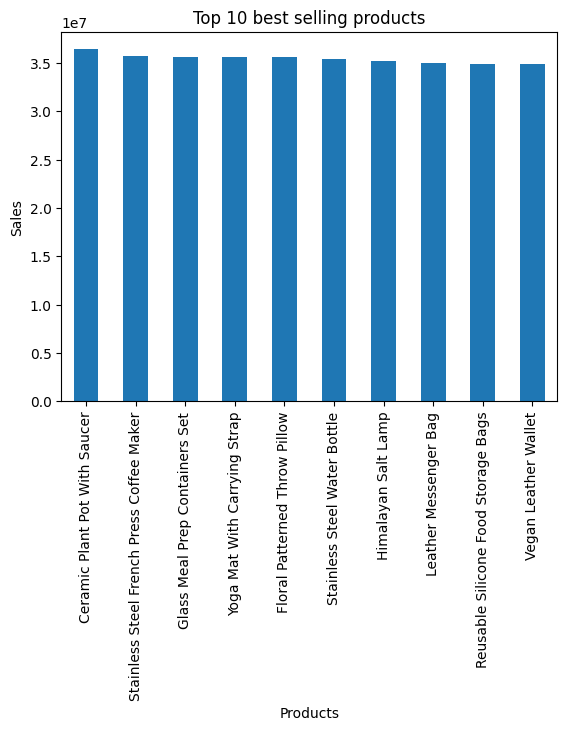

In [23]:
bar=top_products.plot(kind='bar',title='Top 10 best selling products')
bar.set_xlabel('Products')
bar.set_ylabel('Sales')

In [57]:
# low stock products
low_stock=df.groupby('Product')['inventory'].sum().sort_values(ascending=True).head(10)
low_stock

,inventory
Product,
Reusable Silicone Food Storage Bags,1176.0
Bluetooth Wireless Earbuds,1219.0
Bamboo Cutting Board Set,1313.0
Ceramic Plant Pot With Saucer,1331.0
Organic Coconut Oil,1362.0
Yoga Mat With Carrying Strap,1379.0
Vegan Leather Wallet,1489.0
Aromatherapy Essential Oil Diffuser,1492.0
Stainless Steel Water Bottle,1542.0


In [60]:
# frequently low stocking products
low_stock = df[df['inventory'] < 20]  # Threshold can vary
low_stock_products = low_stock['Product'].value_counts().head(10)
low_stock_products

,count
Product,
Stainless Steel French Press Coffee Maker,9
Bamboo Cutting Board Set,7
Memory Foam Travel Neck Pillow,6
Resistance Band Set,6
Floral Patterned Throw Pillow,6
Aromatherapy Essential Oil Diffuser,6
Bluetooth Wireless Earbuds,6
Leather Messenger Bag,5
Reusable Silicone Food Storage Bags,5


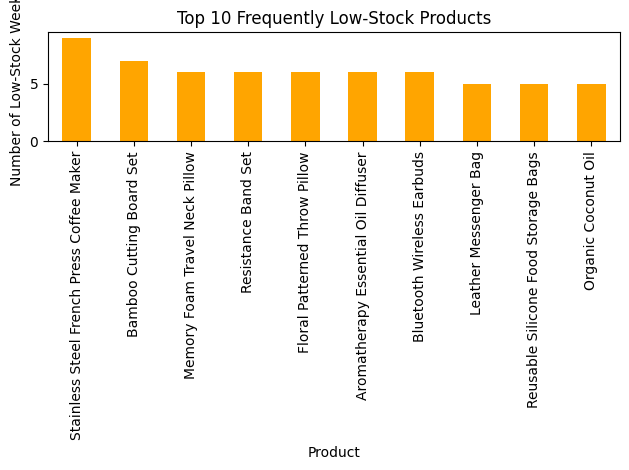

In [61]:
low_stock_products.plot(kind='bar', title='Top 10 Frequently Low-Stock Products', color='orange')
plt.ylabel('Number of Low-Stock Weeks')
plt.xlabel('Product')
plt.tight_layout()
plt.show()

In [62]:
# Reusable Silicone Food Storage Bags is the product that is most out of stock

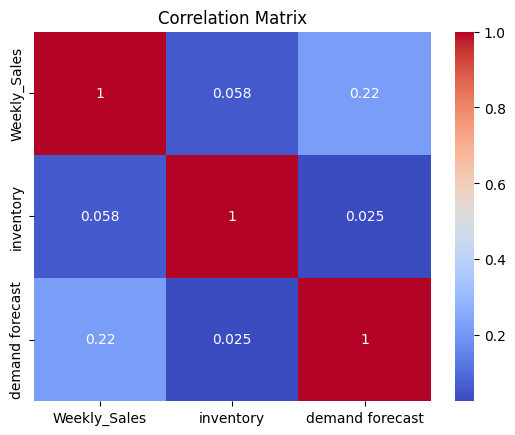

In [64]:
numeric_cols = ['Weekly_Sales', 'inventory', 'demand forecast']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

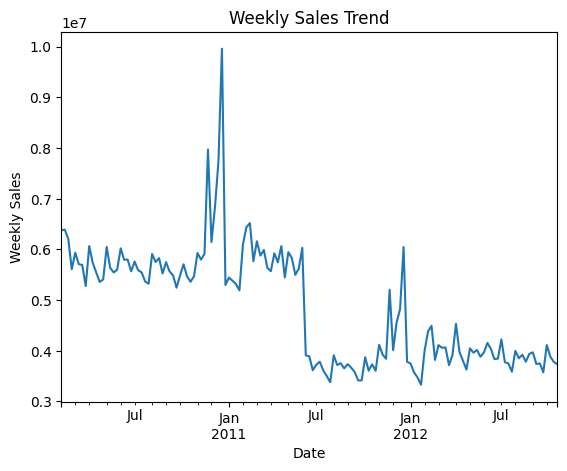

In [65]:
# Weekly sales trend
weekly_sales_trend = df.groupby('Date')['Weekly_Sales'].sum()
weekly_sales_trend.plot(kind='line', title='Weekly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

Inventory Health Analysis

In [67]:
df['Inventory_Turnover'] = df['Weekly_Sales'] / df['inventory'].replace(0,1)
df['Inventory_Turnover']

,Inventory_Turnover
0,39135.497619
1,6541.663108
2,19421.303253
3,17844.653038
4,17469.737978
...,...
494,33285.205806
495,35129.164386
496,35360.762807
497,33109.965833


In [90]:
overstock_threshold = 220
understock_threshold = 25

In [91]:
# classify stock
df['Stock_Status'] = pd.cut(df['inventory'],
                            bins=[-1, understock_threshold, overstock_threshold, float('inf')],
                            labels=['Understocked', 'Healthy', 'Overstocked'])

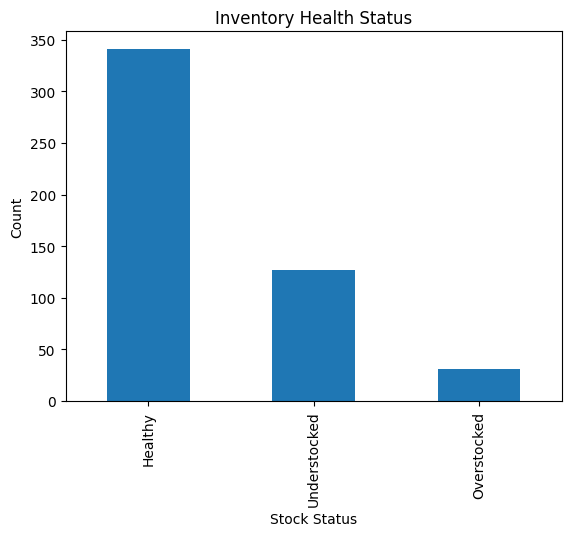

In [92]:
df['Stock_Status'].value_counts().plot(kind='bar', title='Inventory Health Status')
plt.xlabel('Stock Status')
plt.ylabel('Count')
plt.show()

In [108]:
# predictive model
# predicting inventory levels based on thr valuees of Weekly sales and demand forecast

In [94]:
x = df[['Weekly_Sales', 'demand forecast']]
y = df['inventory level']

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [101]:
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.92      0.93      0.93        92
           1       0.14      0.12      0.13         8

    accuracy                           0.87       100
   macro avg       0.53      0.53      0.53       100
weighted avg       0.86      0.87      0.87       100



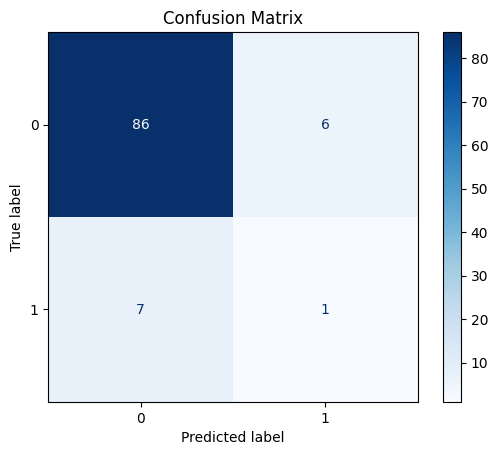

In [105]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

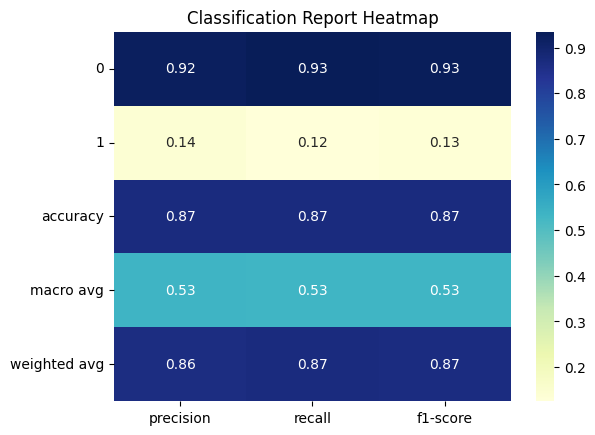

In [107]:
report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="YlGnBu")
plt.title("Classification Report Heatmap")
plt.show()